In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [3]:
import pandas as pd

# 데이터를 먼저 로드합니다.
df= pd.read_table("/Users/ohheungchan/workspace/AI_Study/heart+disease/reprocessed.hungarian.data", sep=' ', header=None)

# 열 이름을 변경합니다.
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

# DataFrame을 확인합니다.
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,-9.0,-9.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,-9.0,-9.0,3.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,-9.0,-9.0,6.0,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,-9.0,-9.0,0.0
293,53.0,1.0,4.0,130.0,182.0,0.0,0.0,148.0,0.0,0.0,-9.0,-9.0,-9.0,0.0


Text(0.5, 1.0, 'num')

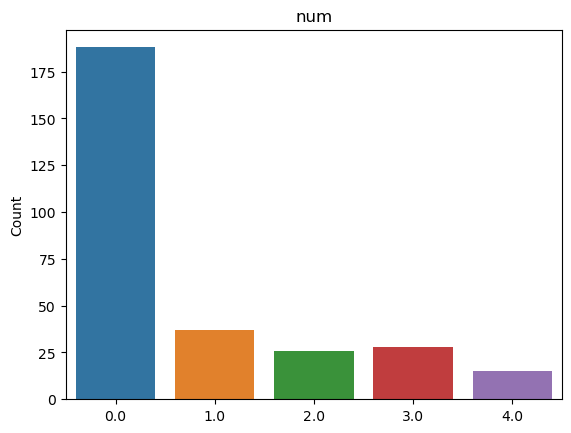

In [4]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="num")
plt.xlabel("")
plt.ylabel("Count")
plt.title("num")

In [5]:
sampled_df = pd.DataFrame()  # 추출된 데이터를 저장할 빈 DataFrame 생성
classes = df['num'].unique()  # 'num' 열의 고유값을 추출하여 클래스 목록 생성

for cls in classes:
    class_df = df[df['num'] == cls]  # 현재 클래스에 해당하는 데이터만 필터링
    if len(class_df) > 0:  # 현재 클래스에 샘플이 있는 경우에만 샘플링 수행
        sampled_class_df = class_df.sample(n=150, replace=True)  # 클래스 데이터에서 150개 샘플 추출, replace=True는 데이터가 150개 미만일 때 중복 허용
        sampled_df = pd.concat([sampled_df, sampled_class_df], ignore_index=True)  # 추출된 데이터를 sampled_df에 추가

df =sampled_df
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,49.0,1.0,4.0,120.0,297.0,-9.0,0.0,132.0,0.0,1.0,2.0,-9.0,-9.0,0.0
1,55.0,0.0,2.0,110.0,344.0,0.0,1.0,160.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
2,61.0,0.0,4.0,130.0,294.0,0.0,1.0,120.0,1.0,1.0,2.0,-9.0,-9.0,0.0
3,49.0,0.0,2.0,110.0,-9.0,0.0,0.0,160.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,48.0,1.0,4.0,160.0,329.0,0.0,0.0,92.0,1.0,1.5,2.0,-9.0,-9.0,2.0
746,40.0,0.0,4.0,150.0,392.0,0.0,0.0,130.0,0.0,2.0,2.0,-9.0,6.0,2.0
747,53.0,1.0,4.0,120.0,246.0,0.0,0.0,116.0,1.0,0.0,-9.0,-9.0,-9.0,2.0
748,58.0,1.0,3.0,160.0,211.0,1.0,1.0,92.0,0.0,0.0,-9.0,-9.0,-9.0,2.0


In [5]:
# 데이터프레임을 4배로 증가시킵니다.
new_df = pd.concat([df] * 4, ignore_index=True)

# 결과를 확인합니다.
df = new_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,-9.0,-9.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,-9.0,-9.0,3.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1176,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,-9.0,-9.0,6.0,0.0
1177,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,-9.0,-9.0,0.0
1178,53.0,1.0,4.0,130.0,182.0,0.0,0.0,148.0,0.0,0.0,-9.0,-9.0,-9.0,0.0


Text(0.5, 1.0, 'num')

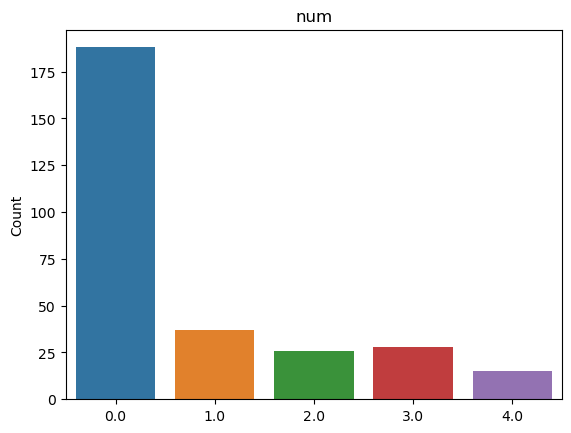

In [6]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="num")
plt.xlabel("")
plt.ylabel("Count")
plt.title("num")

In [7]:
df['num'].value_counts()

num
0.0    188
1.0     37
3.0     28
2.0     26
4.0     15
Name: count, dtype: int64

In [8]:
# 결측치 확인
df.isnull().sum()

age         1
sex         1
cp          1
trestbps    1
chol        1
fbs         1
restecg     1
thalach     1
exang       1
oldpeak     1
slope       1
ca          1
thal        1
num         1
dtype: int64

In [9]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [10]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,-9.0,-9.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,-9.0,-9.0,3.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,48.0,0.0,2.0,-9.0,308.0,0.0,1.0,-9.0,-9.0,2.0,1.0,-9.0,-9.0,0.0
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,-9.0,-9.0,6.0,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,-9.0,-9.0,0.0


In [11]:
X=df.drop('num',axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,-9.0,-9.0,-9.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,-9.0,-9.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,-9.0,-9.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0


In [12]:
y=df['num']
y.value_counts()

num
0.0    188
1.0     37
3.0     28
2.0     26
4.0     15
Name: count, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [14]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [15]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 50)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 50)
print(X_test.shape, y_test.shape)   

(186, 50, 13) (186,)
(10, 50, 13) (10,)


In [16]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [17]:
from tensorflow.keras.layers import Conv1D 
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout,LSTM,Reshape



In [18]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]


In [20]:
#model1

input_layer = Input(shape=(n_timesteps,n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='tanh')(input_layer) 
conv2 = Conv1D(filters=128, kernel_size=3, activation='tanh')(conv1) 
conv3 = Conv1D(filters=128, kernel_size=3, activation='tanh')(conv2) 
drop = Dropout(0.5)(conv3)

flat = Flatten()(drop)
dens = Dense(128, activation = "tanh")(flat)
outputs = Dense(5, activation = "sigmoid")(dens)

model = keras.Model(input_layer, outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50, 13)]          0         
                                                                 
 conv1d_3 (Conv1D)           (None, 48, 64)            2560      
                                                                 
 conv1d_4 (Conv1D)           (None, 46, 128)           24704     
                                                                 
 conv1d_5 (Conv1D)           (None, 44, 128)           49280     
                                                                 
 dropout_1 (Dropout)         (None, 44, 128)           0         
                                                                 
 flatten_1 (Flatten)         (None, 5632)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               7210

In [87]:
#model1
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPooling1D

model = Sequential()
model.add(Conv1D(filters=160, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(128,return_sequences=True))
model.add(LSTM(128))

model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_61 (Conv1D)          (None, 8, 160)            6400      
                                                                 
 dropout_5 (Dropout)         (None, 8, 160)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4, 160)           0         
 )                                                               
                                                                 
 lstm_4 (LSTM)               (None, 4, 128)            147968    
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                        

In [38]:
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=1))

model.add(LSTM(100))

model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 3, 64)             2560      
                                                                 
 conv1d_7 (Conv1D)           (None, 1, 64)             12352     
                                                                 
 dropout_6 (Dropout)         (None, 1, 64)             0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 lstm_6 (LSTM)               (None, 100)               66000     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                      

In [43]:
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))

model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))

model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 3, 64)             2560      
                                                                 
 dropout_9 (Dropout)         (None, 3, 64)             0         
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 1, 100)            66000     
                                                                 
 lstm_8 (LSTM)               (None, 1, 100)            80400     
                                                                 
 lstm_9 (LSTM)               (None, 100)               80400     
                                                      

In [21]:
train_epochs = 100
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True, validation_split = 0.1)

Epoch 1/100


2024-02-24 01:08:40.500087: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-02-24 01:08:40.827612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 2s 219ms/step - loss: 3.1951 - accuracy: 0.4491 - val_loss: 1.1028 - val_accuracy: 0.7368
Epoch 2/100
5/6 [========================>.....] - ETA: 0s - loss: 1.3798 - accuracy: 0.6313

2024-02-24 01:08:42.154072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 0s 20ms/step - loss: 1.3574 - accuracy: 0.6347 - val_loss: 0.9156 - val_accuracy: 0.7895
Epoch 3/100
6/6 [==============================] - 0s 18ms/step - loss: 1.1182 - accuracy: 0.6707 - val_loss: 0.8203 - val_accuracy: 0.7895
Epoch 4/100
6/6 [==============================] - 0s 18ms/step - loss: 1.0510 - accuracy: 0.6707 - val_loss: 0.8072 - val_accuracy: 0.7895
Epoch 5/100
6/6 [==============================] - 0s 18ms/step - loss: 1.1048 - accuracy: 0.6707 - val_loss: 0.7724 - val_accuracy: 0.7895
Epoch 6/100
6/6 [==============================] - 0s 18ms/step - loss: 1.0432 - accuracy: 0.6707 - val_loss: 0.8454 - val_accuracy: 0.7895
Epoch 7/100
6/6 [==============================] - 0s 18ms/step - loss: 1.0519 - accuracy: 0.6707 - val_loss: 0.8304 - val_accuracy: 0.7895
Epoch 8/100
6/6 [==============================] - 0s 18ms/step - loss: 0.9817 - accuracy: 0.6707 - val_loss: 0.7503 - val_accuracy: 0.7895
Epoch 9/100
6/6 [===============

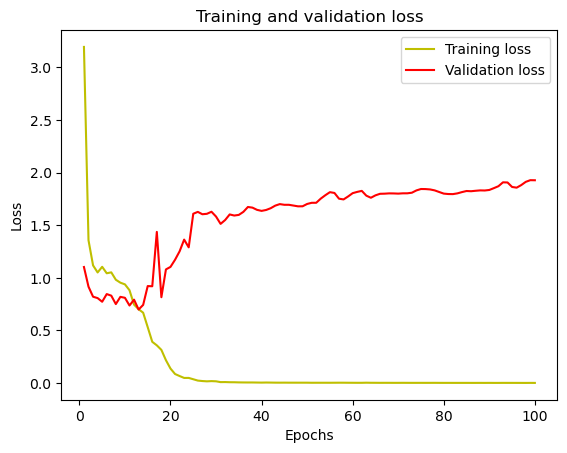

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

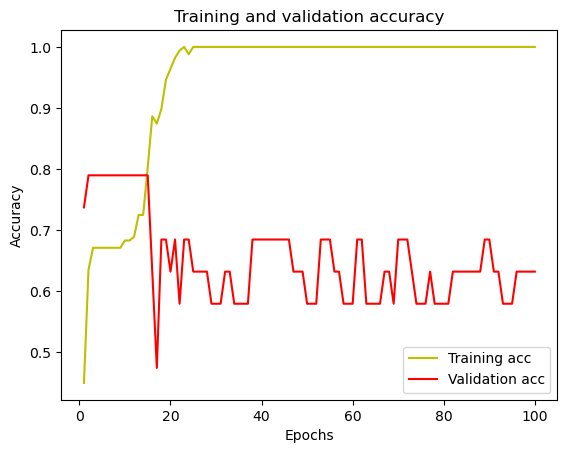

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix



y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

2024-02-24 01:09:01.788191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 313ms/step


In [25]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.00      0.00      0.00         1
           2       1.00      0.50      0.67         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1

    accuracy                           0.60        10
   macro avg       0.33      0.30      0.29        10
weighted avg       0.51      0.60      0.52        10

[[5 0 0 0 0]
 [1 0 0 0 0]
 [0 1 1 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


/Users/ohheungchan/anaconda3/envs/tf29_py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ohheungchan/anaconda3/envs/tf29_py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ohheungchan/anaconda3/envs/tf29_py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo